🎵 MFCC stands for Mel-Frequency Cepstral Coefficients.
It's one of the most popular audio features used in speech and audio processing tasks — like speech recognition, voice classification, and deepfake detection.

🔍 What does MFCC do?
MFCC converts a raw audio waveform into a compact, meaningful representation that captures the important characteristics of human speech.

🧠 Why MFCC is useful:
Human hearing is non-linear — MFCC mimics how our ears perceive sound (especially speech).

It focuses on frequencies between 300Hz–3400Hz, which is where human voice typically lies.

It reduces data while preserving what matters most for recognizing speech or voice identity.

🧬 How it's computed (Simplified):
Split audio into small frames.

Apply FFT (Fast Fourier Transform) to convert to frequency domain.

Map to Mel scale (a perceptual scale).

Take the log of the powers at each Mel frequency.

Apply DCT (Discrete Cosine Transform) → gives MFCCs.

🔢 MFCC Output:
A 2D matrix: (n_mfcc, time_steps)

You typically extract 13 to 40 MFCCs per time frame.

It captures how sound frequencies change over time, like a "voice fingerprint".

📊 Visual Example:
Looks like this:

less
Copy
Edit
MFCC shape: (40, 862)
40 coefficients across 862 time steps
You can even visualize it like a spectrogram, showing how vocal patterns evolve.

In [6]:
# 📦 1. Imports
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.18.0


In [2]:
## data preprocessing

In [9]:
#Feature Extraction Function

def extract_features(file_path, max_pad_len=862):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        if mfccs.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :max_pad_len]
        return mfccs
    except Exception as e:
        print(f"Error encountered while parsing file: {file_path}")
        return None


In [12]:
# Load Dataset

dataset_path = r"C:\Users\101ri\OneDrive\Desktop\New DeepFake\audio_fake\AUDIO"
labels = []
data = []

for label in ['real', 'fake']:
    folder_path = os.path.join(dataset_path, label)
    for file in os.listdir(folder_path):
        if file.endswith(".wav"):
            file_path = os.path.join(folder_path, file)
            features = extract_features(file_path)
            if features is not None:
                data.append(features)
                labels.append(0 if label == 'real' else 1)

X = np.array(data)
y = np.array(labels)
X = X[..., np.newaxis]  # CNN input shape
print(f"Data shape: {X.shape}, Labels shape: {y.shape}")


Data shape: (64, 40, 862, 1), Labels shape: (64,)


In [13]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

array([[[[-4.5680807e+02],
         [-4.3406326e+02],
         [-4.2552057e+02],
         ...,
         [-1.6016876e+02],
         [-1.6786598e+02],
         [-1.9322734e+02]],

        [[ 4.5263611e+01],
         [ 5.4959564e+01],
         [ 7.0205643e+01],
         ...,
         [ 9.8656876e+01],
         [ 6.3571217e+01],
         [ 1.1825800e+01]],

        [[ 1.4557164e+01],
         [ 1.7480190e+01],
         [ 2.9737387e+01],
         ...,
         [-3.7743576e+01],
         [ 1.5351385e+01],
         [ 6.5229210e+01]],

        ...,

        [[ 1.8098100e+00],
         [ 1.4575789e+00],
         [-3.2056515e+00],
         ...,
         [-2.2902351e-02],
         [ 1.0199199e+01],
         [ 9.7161751e+00]],

        [[-2.3458505e+00],
         [-1.5763160e+00],
         [-3.2456908e+00],
         ...,
         [-1.6927215e+00],
         [ 2.2323394e+00],
         [ 8.9901047e+00]],

        [[-5.1375542e+00],
         [-1.9227620e+00],
         [ 1.2369499e+00],
         ...,
 

In [15]:
## building model

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()

C:\Program Files\Drag Software\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 38, 860, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 19, 430, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19, 430, 32)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 17, 428, 64)         │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 214, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 214, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 109568)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,024,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,043,777 (53.57 MB)

 Trainable params: 14,043,777 (53.57 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# model trauining

history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 0.5529 - loss: 39.2483 - val_accuracy: 0.8462 - val_loss: 15.5551
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.8717 - loss: 16.0368 - val_accuracy: 0.8462 - val_loss: 8.5065
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.8618 - loss: 7.7057 - val_accuracy: 0.8462 - val_loss: 4.2640
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8049 - loss: 6.6093 - val_accuracy: 0.8462 - val_loss: 2.0987
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.7991 - loss: 4.6682 - val_accuracy: 0.8462 - val_loss: 1.3802
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - accuracy: 0.7538 - loss: 4.8967 - val_accuracy: 0.8462 - val_loss: 1.6452
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8169 - loss: 2.4632 - val_accuracy: 0.8462 - val_loss: 2.3465
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.8393 - loss: 3.4353 - val_accuracy: 0.8462 - val_lo

In [19]:
model.history.history           #loss

{'accuracy': [0.5490196347236633,
  0.8823529481887817,
  0.8627451062202454,
  0.8039215803146362,
  0.7843137383460999,
  0.7647058963775635,
  0.8235294222831726,
  0.843137264251709,
  0.8039215803146362,
  0.686274528503418,
  0.8627451062202454,
  0.8823529481887817,
  0.843137264251709,
  0.7647058963775635,
  0.8235294222831726,
  0.8039215803146362,
  0.8627451062202454,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817,
  0.8823529481887817],
 'loss': [43.75067901611328,
  15.183518409729004,
  7.269059181213379,
  7.114658832550049,
  5.286778926849365,
  4.589427947998047,
  2.361647844314575,
  3.0366103649139404,
  1.5182827711105347,
  1.9325833320617676,
  0.5404597520828247,
  0.6465384364128113,
  0.24773262441158295,
  0.49247995018959045,
  0.47652778029441

Text(0.5, 1.0, 'Accuracy Over Epochs')

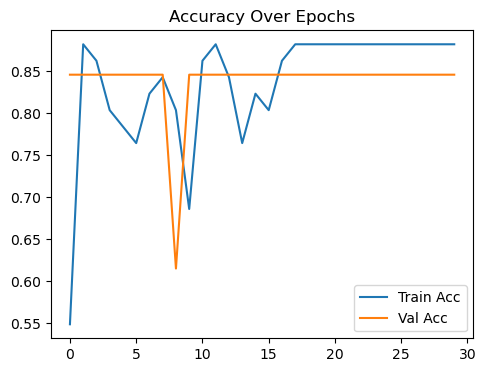

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.legend()
plt.title("Accuracy Over Epochs")

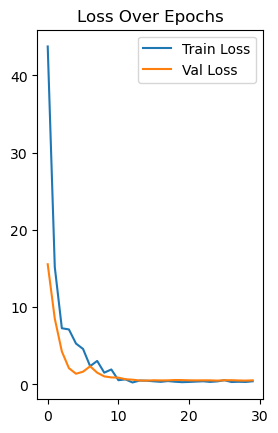

In [21]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.legend()
plt.title("Loss Over Epochs")
plt.show()

In [22]:
# model evaluation

y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

print("\nClassification Report:\n", classification_report(y_test, y_pred_labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.85      1.00      0.92        11

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      0.78        13



C:\Program Files\Drag Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Drag Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Program Files\Drag Software\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

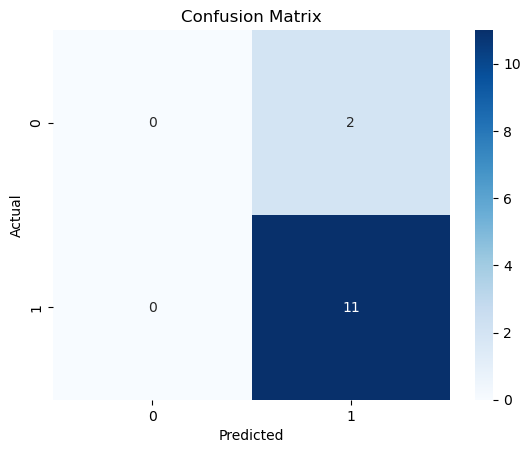

In [23]:
conf_matrix = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
model.save('deepfake_voice_detection_model.h5')

In [25]:
new_sample = extract_features(r"C:\Users\101ri\OneDrive\Desktop\New DeepFake\audio_fake\AUDIO\FAKE\biden-to-linus.wav")
if new_sample is not None:
    new_sample = new_sample[np.newaxis, ..., np.newaxis]
    prediction = model.predict(new_sample)
    label = 'Fake' if prediction > 0.5 else 'Real'
    print(f'The audio is predicted to be: {label}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
The audio is predicted to be: Fake
